# Importation des librairies utilisées.

-Nombre des predicteurs est faible
evaluer la pertinence de faire Feature engineering
- Region: subdivision Alberta 
Evaluer si dans les valeurs de salaire horaire moyen la distribution des probabilites- biais
tout le y ensuite par regions
:ecart type bien 

In [ ]:
import os
import sys

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import scipy.stats as stats

%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# Pour la reproductibilité des résultats
np.random.seed(43)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')

sns.set(rc={'figure.figsize':(6, 4)})
sns.set_theme(context="notebook", style="white", palette="pastel",font_scale=0.9)

# AED

## Questions

### Questions préliminaires de l’AED

1. Quelles sont les descripteurs (colonnes) du data set ?

2. Combien d'enregistrements (lignes) ont été fournis ?

3. Quel est le format des données. Par exemple, dans quel format les dates sont fournies, existe-t-il des valeurs numériques, à quoi ressemblent les différentes valeurs catégorielles ?

4. Y a-t-il des valeurs manquantes ? Y a-t-il des variables avec un nombre élevé de valeurs manquantes ?

5. Est-ce que les classes sont-elles équilibrées ?

6. Est-ce qu'il y a des variables aberrantes ?

7. Laquelle des variables pourrait être utile à mon objectif ? 

8. Que représente une seule ligne de l'ensemble de données ? 

### Exploration plus approfondie des données

1. Numérique variable : Statistique descriptive 

* Quels sont les statistiques descriptives de base d’une variable numérique : count, mean, std, min, 25%, median, 75%, max

* Quelle est la plage d’une variable numérique ? 

* Les variables sont-elles fortement corrélées les unes aux autres ?

* Les variables sont-elles fortement corrélées avec le Target ?

2. Variable catégorielle

* Quelle est la valeur la plus fréquente pour une variable catégorielle ?

* Quelle est la moyenne d’une variable numérique regroupée par une variable catégorielle ?

* Combien de points de données y a-t-il, regroupés par 2 variables catégorielles ?

3. Visualisation des données

* Quelle est la distribution d’une variable numérique ? Y a-t-il des erreurs à gérer ?

* barchart (variable catégorielle univariante)

* heatmap (deux variable catégorielle)

* scatterplot (variable numérique bivarie)

* violon (for outliers : variable target)


# Informations sur la base de données.

#### Buts de l'analyse
Notre analyse vise à montrer un exemple complet de projet comprenant les volets suivants:
<ul>
<li>le prétraitement des données,</li>
<li>l'entrainement d'un modèle de regression avec celles-ci,</li>
<li>l'identification des variables mesurées les plus importantes, c.-à-d. celles qui ont le plus grand effet pour prédire le salaire horaire moyen.</li>
</ul>

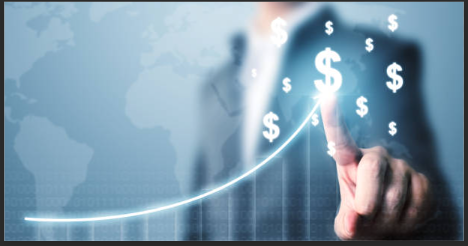

### Analyse des forme

Variable target : Salaire horaire moyen, Difference salaire homme/femme

* **Ligne et colonne: (168300, 15)**

niveau de detail, une ligne par :
                  Géographie, 
                  Classification nationale des professions(CNP4),
                  Sexe,
                  Groupe d’âge,
                  Période de référence

* **Type de variables: 10 variables de type numérique et 5 variables qualitative.**

    * Géographie : Canada, Province ou territoire
    * Ratio du salaire hebdomadaire moyen entre les femmes et les hommes	
    * Ratio du salaire hebdomadaire médian entre les femmes et les hommes
    * Ratio du salaire horaire moyen entre les femmes et les hommes	
    * Ratio du salaire horaire médian entre les femmes et les hommes	
    * Salaire hebdomadaire moyen	
    * Salaire hebdomadaire médian	
    * Salaire horaire moyen	
    * Salaire horaire médian	
    * Total des employés, tous les salaires
    * Classification nationale des professions(CNP4)
    * Sexe
    * Groupe d’âge
    * Genre de travail	
    * Période de référence : annuelle (1997-2021)

La repartition des individus est egale pour toutes les modalites des variables Sexe, CNP, Groupe d'age

* **Type des valeurs manquantes**  

    * 25% des valeurs a 0 pour les variables 
        * Salaire hebdomadaire moyen	
        * Salaire hebdomadaire médian	
        * Salaire horaire moyen	
        * Salaire horaire médian
    
Il y a 48277(25%) des enregsitrements dont la valeur du salaire hebdomadaire moyen est egal a 0.

Repartition: 

CNP: 
* 2049 (1.37%), Superviseurs/superviseures et métiers techniques dans les ressources naturelles, l'agriculture et la production connexe, 
* 2106 (1.25%), Personnel des services de protection public de première ligne
* 2049	(1.22%) Cadres supérieurs/cadres supérieures [00]		

Regions:

* 4.60% (7743) dans Île-du-Prince-Édouard et Terre-Neuve-et-Labrador	
* 4.42% (5986)	Nouveau-Brunswick et Nouvelle-Écosse
* 1.56% (2628) Québec	   
    
* **Valeurs extremes **

On va supposer, pour l'exemple, que la base de données contient 0,5% de valeurs aberrantes de toutes sortes. Ce n'est pas exagéré. Cela représente $0,005*168300 \approx 841$ valeurs.

On utilise la méthode de la [forêt d'isolation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) pour détecter et éliminer un maximum de 0,5% des valeurs possiblement aberrantes.  
    
### Analyse de structure

* Calculer difference de Salaire horaire moyen entre  Salaire horaire moyen (homme)-  Salaire horaire moyen(femme)
* Conserver seulement les variables :  
    * Régions : Province ou territoire,
    * Salaire horaire moyen	
    * Classification nationale des professions(CNP4)
    * Sexe
    * Groupe d’âge
    * Genre de travail	
    * Période de référence : annuelle


### Nettoyage des donnees: Recommandations


* Filtrer la modalite "Les deux sexes" de la variable **Sexe**
* Filtrer la modalite "15 ans et plus" de la variable **Groupe d'âge**
* Filtrer la modalite "'Canada'" de la variable **Region**
* Prendre les occurences plus grande que 0



In [ ]:
# valider la version de python

print (f"Python version: {sys.version}\n")
print (f"Matplotlib version: {matplotlib.__version__}")
print (f"Numpy version: {np.__version__}")
print (f"Seaborn version: {sns.__version__}")

Note : cet notebbok est réalisée avec les versions suivants:

Python version: 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]

Matplotlib version: 3.5.2

Numpy version: 1.21.5

Seaborn version: 0.11.2

# Partie I: Prétraitement des données.

## Lecture des bases de données en format CSV.

In [ ]:
def load_db():
    salaire_employe_CNP = pd.read_csv(r"D:\Daiana\Documents\AEC Intelligence artificielle\7_A57_Mise en place d'un écosystème d'IA\salary\data\interim\salaire_employe_CNP",sep=",")
   # duree_emploi_CNP=pd.read_csv("duree_emploi_CNP",sep=",")
   # postes_vacants_CNP=pd.read_csv("postes_vacants_CNP",sep=",")
  #  caractéristiques_population_active=pd.read_csv("caractéristiques_population_active",sep=",")
   # heures_habituellement_travaille=pd.read_csv("heures_habituellement_travaille",sep=",")
   # heures_effectivement_travaille=pd.read_csv("heures_effectivement_travaille",sep=",")
   # personnes_avec_plus_un_emploi=pd.read_csv("personnes_avec_plus_un_emploi",sep=",")
   # raison_quitter_emploi=pd.read_csv("raison_quitter_emploi",sep=",")
   # absence_travail_temps_plein=pd.read_csv("absence_travail_temps_plein",sep=",")
    return salaire_employe_CNP#,duree_emploi_CNP,postes_vacants_CNP,caractéristiques_population_active,heures_habituellement_travaille,heures_effectivement_travaille,personnes_avec_plus_un_emploi,raison_quitter_emploi,absence_travail_temps_plein

In [ ]:
salaire_employe_CNP=load_db()
#,duree_emploi_CNP,postes_vacants_CNP,caractéristiques_population_active,heures_habituellement_travaille,heures_effectivement_travaille,personnes_avec_plus_un_emploi,raison_quitter_emploi,absence_travail_temps_plein=load_db()

## Explorer les données

In [ ]:
def explore_df(df,head=5):
    print('########################shape#############')
    print(df.shape)
    print("#########################Types####################")
    print(df.dtypes)
    print("##################### Tail #####################")
    print(df.tail(head))
    print("##################### NA #####################")
    print(df.isnull().sum())
    print("##################### Quantiles #####################")
    print(df.describe([0.10, 0.25, 0.50,0.75,0.90, 0.95, 0.99]).T)

In [ ]:
explore_df(salaire_employe_CNP,head=5)

In [ ]:
salaire_employe_CNP.head(5)

In [ ]:
salaire_employe_CNP.tail(5)

### Dimensions du dataset

In [ ]:
print("Les dimensions du jeux des donnees: ", salaire_employe_CNP.shape)
print() 

In [ ]:
# Size of our data set
## le nombre de lignes multiplié par le nombre de colonnes si DataFrame.
print("Nombre d’éléments:", salaire_employe_CNP.size)
print()

Le nombre d'individus est égale à 504900 et le nombre de descripteurs est égale à 15

### Type des donnees

In [ ]:
salaire_employe_CNP.dtypes

In [ ]:
salaire_employe_CNP.dtypes.value_counts()

 Le jeu des données a 10 variables de type numérique et 5 variables qualitative.

In [ ]:
salaire_employe_CNP.describe()

In [ ]:
salaire_employe_CNP.info()

* 25% de la population ont les informations sur les salaires avec la valeur 0
* 50% de la population ont le salaire moyen hebdomadaire moins de 277.75 et le salaire médian moins de 250
* 50% de la population ont le salaire horaire moyenne au moins de 11.49, et le salaire horaire médiane moins de 10.25 dollars

In [ ]:
salaire_employe_CNP.describe(include=[object])

* La variable Regions contient 11 modalites
* La variable CNP contient 51 modalites
* La variable Sexe contienttient 3 variables
* La variable Groupe d'age contient 4 variables
* La variable genre de travail contient 3 variables

In [ ]:
#lister les  occurences de chacune des occurences non-numériques
for key in salaire_employe_CNP.select_dtypes(exclude='number').columns:
    print("\n---- %s ----" % key)
    print(salaire_employe_CNP[key].value_counts())

In [ ]:
salaire_employe_CNP.Regions.unique()

In [ ]:
salaire_employe_CNP.Sexe.unique()

In [ ]:
salaire_employe_CNP["Groupe d'âge"].unique()

In [ ]:
salaire_employe_CNP["Genre de travail"].unique()

In [ ]:
salaire_employe_CNP["CNP"].unique()

In [ ]:
salaire_employe_CNP.columns

### Renommage

In [ ]:
#operation de trim
cols = salaire_employe_CNP.select_dtypes(object).columns
salaire_employe_CNP[cols] = salaire_employe_CNP[cols].apply(lambda x: x.str.strip())

In [ ]:
salaire_employe_CNP.rename(columns = {'Ratio du salaire hebdomadaire moyen entre les femmes et les hommes ':"Ratio_salaire_hebdo_moyen"},inplace=True)
salaire_employe_CNP.rename(columns = {'Ratio du salaire hebdomadaire médian entre les femmes et les hommes ':"Ratio_salaire_hebdo_median"},inplace=True)
salaire_employe_CNP.rename(columns = {'Ratio du salaire horaire moyen entre les femmes et les hommes':"Ratio_salaire_horaire_moyen"},inplace=True)
salaire_employe_CNP.rename(columns = {"Ratio du salaire horaire médian entre les femmes et les hommes ":"Ratio_salaire_horaire_median"},inplace=True)

In [ ]:
salaire_employe_CNP.columns

## Filtres

pour notre analuse on considère les filtres suivantes:

* Filtrer la modalite "Les deux sexes" de la variable **Sexe**
* Filtrer la modalite "15 ans et plus" de la variable **Groupe d'âge**
* Filtrer la modalite "'Canada'" de la variable **Region**
* Filtrer la modalite "Ensemble des employés à temps plein et à temps partiel" de la variable **Genre de travail**
* Filtrer les valeurs a 0 pour la variable target 'Salaire horaire moyen'

In [ ]:
salaire_employe_=salaire_employe_CNP.copy()

In [ ]:
salaire_employe_CNP["Salaire horaire moyen"].min()

In [ ]:
def filtre_df_salaire():
    filtre_sexe=salaire_employe_CNP.Sexe.isin(["Femmes","Hommes"])
    filtre_plus_15=salaire_employe_CNP["Groupe d\'âge"]!="15 ans et plus"
    filtre_region=salaire_employe_CNP["Regions"]!="Canada"
    filtre_genre_travail=salaire_employe_CNP["Genre de travail"]!="Ensemble des employés à temps plein et à temps partiel"
    filtres_sal_0=salaire_employe_CNP["Salaire horaire moyen"]!=0.0
    
    df1=salaire_employe_CNP[filtre_sexe]
    df2=df1[filtre_plus_15]
    df3=df2[filtre_region]
    df4=df3[filtre_genre_travail]
    df=df4[filtres_sal_0]
    
    return df

In [ ]:
salaire_employe_CNP=filtre_df_salaire()

In [ ]:
salaire_employe_CNP["Genre de travail"].unique()

## Visualisation des données

In [ ]:
salaire_employe_CNP.columns

### Annee

In [ ]:
sns.lineplot(data=salaire_employe_CNP, 
             x="Annee", 
             y='Salaire horaire moyen',
             hue='Sexe',
            markers=True,
            dashes=False)
plt.title(label='Croissance annuelle de la moyen du salaire horaire homme vs femme,2000-2021,(Source: Donnees StatCanada)',
          fontdict={'fontsize':9}, loc='center')
plt.show()

Entre 2000 et 2020, l'écart de rémunération horaire moyen est démeuré 
stable entre les salaires de femmes et les salaires des hommes.

In [ ]:
salaire_employe_CNP["Groupe d\'âge"].unique()

In [ ]:
moyensf=pd.Series(salaire_employe_CNP[salaire_employe_CNP['Sexe']=='Femmes'].groupby('Annee')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyensh=pd.Series(salaire_employe_CNP[salaire_employe_CNP['Sexe']=='Hommes'].groupby('Annee')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
diff=moyensh-moyensf
diff

In [ ]:
plt.figure(figsize=(9,4))
plt.plot(diff)
plt.title(label='Croissance annuelle moyen du salaire horaire homme vs femme,population active 25 à 54 ans ,2000-2021 (Source: Donnees StatCanada)',
          fontdict={'fontsize':9}, loc='center')
plt.show()

<ul>
En analysant uniquement le salaire horaire moyenne pour la population active de 25 à 54 ans, on constate
un écart de 3.02$ en 2018 qui diminué avec 0.41\$, pour arriver à 2.6\$ en 2020.
</ul>

In [ ]:
# relational plot
filtre_sexe_Ont_Qc=(salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])) & (salaire_employe_CNP['Regions'].isin(['Ontario','Québec']))
sns.relplot(data=salaire_employe_CNP[filtre_sexe_Ont_Qc],
             x="Annee", 
             y='Salaire horaire moyen',
             hue='Sexe',
             col='Regions',
             kind='line',
             #markers=True, 
            dashes=True
            
            )
plt.title(label='Croissance annuelle de la moyen du salaire horaire homme vs femme,1997-2021,Ontario et Quebéc (Source: Donnees StatCanada)',
          fontdict={'fontsize':10}, loc='center',y=1.1)
plt.show()

L'ecart salarial homme femme reste constante aux fil des annee.

In [ ]:
print()
print("Salaire horaire moyen selon région, données(2000-2020) source Stat Canada")
effectifs=pd.Series(salaire_employe_CNP['Regions'].value_counts()).sort_values(ascending=True)
moyens=pd.Series(salaire_employe_CNP.groupby('Regions')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyensf=pd.Series(salaire_employe_CNP[salaire_employe_CNP['Sexe']=='Femmes'].groupby('Regions')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyensh=pd.Series(salaire_employe_CNP[salaire_employe_CNP['Sexe']=='Hommes'].groupby('Regions')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyens=pd.Series(salaire_employe_CNP.groupby('Regions')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
frequence=round((effectifs/salaire_employe_CNP.shape[0])*100,2)
sommaire_Ind=pd.concat([effectifs,frequence], axis=1,keys=['Eff.',"Freq"])
sommaire_Ind['EffectCumulle']=sommaire_Ind['Eff.'].cumsum()
sommaire_Ind['FreqCumulle']= sommaire_Ind['Freq'].cumsum()
sommaire_Ind["Salaire horaire moyen"]=moyens
sommaire_Ind["Salaire horaire moyen femmes"]=moyensf
sommaire_Ind["Salaire horaire moyen hommes"]=moyensh
sommaire_Ind["Diff salaire horaire moyenne"]=moyensh-moyensf
sommaire_Ind

<ul>
Avec avec un salaire horaire moyenne de 22,89\$ Alberta reste en tête du classement suivi par Colombie-Britannique et Saskatchewan.
L'écart de rémunération des hommes vs. femmes est de 3.55\$  en Alberta suivi de Terre-Neuve-et-Labrador, avec 3.19\$   et Saskatchewan.
Au Québec on observe un écart de rémuneration de 2.63\$ .
</ul>    

### Groupe d'age

In [ ]:
salaire_employe_CNP.columns

In [ ]:
#filtre_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])
#filtre_groupe_age=salaire_employe_CNP!="Groupe d'âge"
sns.barplot(data=salaire_employe_CNP, 
             x="Groupe d'âge", 
             y='Salaire horaire moyen',
             hue='Sexe')
plt.title(label="Salaire horaire moyenne selon le groupe d'age,  homme vs femme,1997-2021 (Source: Donnees StatCanada)",
          fontdict={'fontsize':10}, loc='center')
plt.show()

In [ ]:
moyensf=pd.Series(salaire_employe_CNP[(salaire_employe_CNP['Sexe']=='Femmes') & (salaire_employe_CNP['Groupe d\'âge']=="55 ans et plus")]['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyensh=pd.Series(salaire_employe_CNP[(salaire_employe_CNP['Sexe']=='Hommes')& (salaire_employe_CNP['Groupe d\'âge']=="55 ans et plus")]['Salaire horaire moyen'].mean()).sort_values(ascending=True)

print("Moyen du salaire horaire femmes, 55 ans et plus:", moyensf)
print("Moyen du salaire horaire hommes, 55 ans et plus:", moyensh)
print("L'écart rémunération:",moyensh-moyensf)


In [ ]:
sns.boxplot(x=salaire_employe_CNP["Salaire horaire moyen"],
            y=salaire_employe_CNP["Groupe d\'âge"],
            hue=salaire_employe_CNP.Sexe,
           palette='pastel')
plt.title("Distribution salaire hebdomadaire moyen par groupe d'age et sexe, donnee Stat Canada 1997-2021")
plt.show()

<ul>
Le salaire horaire moyenne des femmes est inférieur à celui des hommes, peu importe le groupe d'age.

On observe l'écart le plus important entre les sexes dans les groupes d'âge de 25 à 54 ans, et de 55 ans et plus, ou le 
salaire horaire moyenne est de plus de 4\$ inférieur à celui des hommes.

</ul>

### Genre de travail

In [ ]:
#filtre_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])
sns.barplot(data=salaire_employe_CNP, 
             x="Genre de travail", 
             y='Salaire horaire moyen',
             hue='Sexe')
plt.title(label="Salaire horaire moyenne par genre de travail  homme vs femme,2000-2021 (Source: Donnees StatCanada)",
          fontdict={'fontsize':8}, loc='center')
plt.xticks(rotation=15)
plt.show()

In [ ]:
sns.catplot(x="Groupe d'âge", y="Salaire horaire moyen",
                   hue="Sexe", 
                   col="Genre de travail",
                   data=salaire_employe_CNP, 
                   kind="bar",
                   height=6, 
                   #alpha=0.15,
                   aspect=.7);
#plt.xticks(rotation=25)
plt.show()

On observe l'écart du salaire horaire moyen homme vs. femme augument avec l'âge et le genre de travail.

### Regions 

### Distribution des effectifs par region, region /sexe

In [ ]:
salaire_employe_CNP[['Regions','Sexe']].value_counts().sort_index()

In [ ]:
#sal_empl_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])
#filtre_sexe=salaire_employe_CNP['Sexe'].isin(['Femmes','Hommes'])

plt.figure(figsize=(8,12))
sns.catplot(data=salaire_employe_CNP,
           col_wrap=4,
            x="Salaire horaire moyen" , 
            y="Sexe", 
            kind="box",
            col="Regions",
            #hue='Sexe',
            #palette="pastel",
           dodge=True)
plt.title(label="Distribution du salaire horaire moyen selon regions et sexe,donnees 1997-2021(source Statistique Canada)",
          fontdict={'fontsize':10}, loc='center')
#plt.xticks(rotation=35)
plt.show()

L'écart salarial entre les femmes et hommes est présent dans toutes les provinces.

### CNP

In [ ]:
salaire_employe_CNP[['CNP','Sexe']].value_counts().sort_index()

In [ ]:
print()
print("Salaire horaire moyen selon CNP, données(2000-2020) source Stat Canada")
effectifs=pd.Series(salaire_employe_CNP['CNP'].value_counts()).sort_values(ascending=True)
moyens=pd.Series(salaire_employe_CNP.groupby('CNP')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyensf=pd.Series(salaire_employe_CNP[salaire_employe_CNP['Sexe']=='Femmes'].groupby('CNP')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyensh=pd.Series(salaire_employe_CNP[salaire_employe_CNP['Sexe']=='Hommes'].groupby('CNP')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
moyens=pd.Series(salaire_employe_CNP.groupby('CNP')['Salaire horaire moyen'].mean()).sort_values(ascending=True)
frequence=round((effectifs/salaire_employe_CNP.shape[0])*100,2)
sommaire_Ind=pd.concat([effectifs,frequence], axis=1,keys=['Eff.',"Freq"])
sommaire_Ind['EffectCumulle']=sommaire_Ind['Eff.'].cumsum()
sommaire_Ind['FreqCumulle']= sommaire_Ind['Freq'].cumsum()
sommaire_Ind["Salaire horaire moyen"]=moyens
sommaire_Ind["Salaire horaire moyen femmes"]=moyensf
sommaire_Ind["Salaire horaire moyen hommes"]=moyensh
sommaire_Ind["Diff salaire horaire moyenne"]=moyensh-moyensf
sommaire_Ind.loc[sommaire_Ind["Diff salaire horaire moyenne"]<=4.99,"Ind plus grand que 5"]="False"
sommaire_Ind.loc[sommaire_Ind["Diff salaire horaire moyenne"]>=5,"Ind plus grand que 5"]="True"
sommaire_Ind.loc[sommaire_Ind["Diff salaire horaire moyenne"]<=1.99,"Ind plus grand que 2"]="True"
sommaire_Ind.loc[sommaire_Ind["Diff salaire horaire moyenne"]>=2,"Ind plus grand que 2"]="False"
sommaire_Ind.head()

In [ ]:
print()
print("L'écart du salaire horaire moyen de plus de 5$")

sommaire_Ind[sommaire_Ind["Ind plus grand que 5"]=="True"]

In [ ]:
print()
print("L'écart du salaire horaire moyen inférieur à 2$")

sommaire_Ind[sommaire_Ind["Ind plus grand que 2"]=="True"]

### Analyse de la variable salaire horaire moyenne 

#### Valeurs aberantes 


Les boxplots sont un moyen standard d’afficher la distribution d’une variable en utilisant le premier quartile, la médiane, le troisième quartile et les moustaches.

* La médiane, indiquée par la ligne à l’intérieur de l’encadré.
* La fourchette interquantile (IQR), la boîte elle-même.
* Les quantiles, le 25e (Q1) est l’extrémité inférieure et le 75e (Q3) l’extrémité supérieure de la boîte.
* Les moustaches, qui s’étendent jusqu’à :
* la moustache supérieure : Q3 + 1,5 x IQR
* moustache inférieure : Q1 -1,5 x IQR

Diagramme de probabilite:
https://www.mathworks.com/help/stats/probplot.html

* genere la diagramme de probabilite de donnees d'un echantillon par rapport aux quantils de la loi normale.
* la fonction **probplot** calcule eventuellement une ligne mieux adapte aux donnees

In [ ]:
salaire_employe_CNP.columns

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # histogramme
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('histogramme')

    # Q-Q 
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [ ]:
diagnostic_plots(salaire_employe_CNP,"Salaire horaire moyen")

In [ ]:
salaire_employe_CNP["Salaire horaire moyen"].describe()

La distribution du salaire hebdomadaire moyen est bimodale asymétrique positive. 
Elle est inclinée avec une queue vers la droite. 
Selon le boxplot, il y a quelques valeurs aberrantes à l’extrémité droite de la distribution de la variable.

25% des donnees ont le salaire hebdomadaire moyenne a 0. 

In [ ]:
ax = sns.displot(data=salaire_employe_CNP, x='Salaire horaire moyen',hue="Sexe", kind="kde")
ax.refline(x=salaire_employe_CNP['Salaire horaire moyen'].mean(),color="blue")
ax.refline(x=salaire_employe_CNP['Salaire horaire moyen'].median(),color="grey")
plt.show()

##### Methode boxplot

In [ ]:
def find_skewed_boundaries(df, variable, distance):

    # Calculons les limites en dehors desquelles se situent les valeurs aberrantes
    # pour les distributions biaisées

    # la distance passée en argument, nous donne la possibilité de
    # estimer 1,5 fois ou 3 fois le RQI à calculer
    # les limites.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
upper_boundary, lower_boundary=find_skewed_boundaries(salaire_employe_CNP,'Salaire horaire moyen',1.5)
upper_boundary, lower_boundary

In [ ]:
# examinons le nombre et le pourcentage de valeurs aberrantes
# pour la cote de la dernière course

print('Nombre de individus: {}'.format(len(salaire_employe_CNP)))
print()
print('Individus dont le salaire hebdomadaire moyen avec une valeur > 42.985 : {}'.format(
    len(salaire_employe_CNP[salaire_employe_CNP['Salaire horaire moyen'] > upper_boundary])))
print()
print('% Individus dont le salaire hebdomadaire moyen avec une valeur > 42.985 : {}'.format(
    len(salaire_employe_CNP[salaire_employe_CNP['Salaire horaire moyen'] > upper_boundary])/len(salaire_employe_CNP)*100))

La limite supérieure indique une valeur de ~42.985\$.
La limite inférieure est négative, mais la variable salaire horaire moyen ne prend pas de valeur négative. 

Pour calculer les valeurs aberrantes du salaire horaire moyen, nous n’utilisons donc que la limite supérieure.
Les valeurs aberrantes se situent uniquement à la queue droite de la distribution de celle-ci.

Nous observons 1730 cas, soit 2.04% de l’ensemble de données, avec des valeurs extrêmement élevées pour le salaire.

##### Methode forêt d'isolation

Dans ce qui suit, on va supposer, pour l'exemple, que la base de données contient 0,5% de valeurs aberrantes de toutes sortes. Ce n'est pas exagéré. Cela représente $0,005*84548 \approx 422$ valeurs.

On utilise la méthode de la [forêt d'isolation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) pour détecter et éliminer un maximum de 0,5% des valeurs possiblement aberrantes. 

In [ ]:
from sklearn.ensemble import IsolationForest
# Trouvons les valeurs aberrantes; la variable 'outlier' vaut -1 
# pour les valeurs aberrantes et +1 pour les autres.
i_forest = IsolationForest(contamination= 0.005, random_state=42)
salaire_employe_CNP_=salaire_employe_CNP.copy()
salaire_employe_CNP_['outliers'] = i_forest.fit(np.array(salaire_employe_CNP['Salaire horaire moyen']).reshape(-1, 1)).predict(np.array(salaire_employe_CNP['Salaire horaire moyen']).reshape(-1, 1))

# Affichons les 15 premières données de la base de données
salaire_employe_CNP_[salaire_employe_CNP_['outliers']==-1].head(15)

In [ ]:
salaire_employe_CNP_[salaire_employe_CNP_['outliers']==-1].shape

In [ ]:
salaire_employe_CNP_[salaire_employe_CNP_['outliers']==-1].shape

#### Élimination des valeurs aberrantes.

Il faut éliminer toutes les lignes contenant des valeurs aberrantes. 

In [ ]:
salaire_employe_CNP_ = salaire_employe_CNP_[salaire_employe_CNP_.outliers > 0]
salaire_employe_CNP_ = salaire_employe_CNP_.drop(['outliers'], axis=1)

In [ ]:
salaire_employe_CNP_.shape

In [ ]:
salaire_employe_CNP_['Annee'] = salaire_employe_CNP_['Annee'].astype(int)

In [ ]:
salaire_employe_CNP_.to_csv(r"D:\Daiana\Documents\AEC Intelligence artificielle\7_A57_Mise en place d'un écosystème d'IA\salary\data\processed\salaire_employe_CNP", index = False)

### Salaire horaire moyen

#### Est-ce que le salaire horaire moyen des femmes est significativement différents de celui de hommes?

In [ ]:
dff = salaire_employe_CNP.loc[salaire_employe_CNP['Sexe']=='Femmes']
dff['Salaire horaire moyen'].describe()

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=dff, x='Salaire horaire moyen', kde=True)
plt.title("Distribution du salaire horaire moyen des femmes")
plt.show()

In [ ]:
dfm = salaire_employe_CNP.loc[salaire_employe_CNP['Sexe']=='Hommes']
dfm['Salaire horaire moyen'].describe()

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=dfm, x='Salaire horaire moyen', kde=True)
plt.title("Distribution du salaire horaire moyen des hommes")
plt.show()

Les distributions des salaires hebdommadaires moyens sont asymétrique a droite.
On peut formellement tester la normalité de ces distributions avec un test de [Jarque-Bera](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test) à l'aide de la commande `scipy.stats.jarque_bera` ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html)).

In [ ]:
from scipy.stats import jarque_bera

print("Pour les femmes : ", jarque_bera(dff['Salaire horaire moyen']))
print("Pour les hommes : ", jarque_bera(dfm['Salaire horaire moyen']))

Ainsi, on rejet les hypothèses comme quoi les *salaires horaire moyens* des femmes et des hommes sont distribués selon des lois normales.

Toutefois, les deux distributions ne semblent pas avoir des variances égales : 
* histogramme des hommes un peu plus plat, 
* écart-type des hommes supérieur de 9.17.

On utilise donc le test de Kruskal-Wallis H Test,pour teste si les distributions de deux échantillons sont égales ou non.

In [ ]:
sns.boxplot(x="Salaire horaire moyen", y=salaire_employe_CNP["Sexe"],
                   data=salaire_employe_CNP, palette="Set3")
plt.show()

In [ ]:
from scipy.stats import kruskal

stat, p = kruskal(dff['Salaire horaire moyen'], dfm['Salaire horaire moyen'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Probablement la même distribution")
else:
    print('Distributions probablement différentes')


Ainsi, on rejette l'hypothèse que les hommes et les femmes ont le même salaire horaire moyen.

### salaires hebdomandaire moyenne a 0

In [ ]:
salaire_employe_

In [ ]:
filtre_salaire0=salaire_employe_["Salaire horaire moyen"]==0

In [ ]:
salaire_employe_[filtre_salaire0].head(5)

In [ ]:
sns.displot(salaire_employe_[filtre_salaire0] ,x="Annee",hue='Sexe',col="Sexe")
plt.ylabel("Nbr effectifs")
plt.title("Nombre d'effectifs selon l’année, données de 1997-2021 (fournies par stat canada) ")
plt.show()
plt.show()

In [ ]:
y=salaire_employe_['Salaire hebdomadaire moyen'][filtre_salaire0].value_counts()
y

In [ ]:
salaire_employe_[['Salaire hebdomadaire moyen','Sexe']][filtre_salaire0].groupby('Sexe').value_counts()

In [ ]:
effectifs=pd.Series(salaire_employe_[filtre_salaire0]['CNP'].value_counts()).sort_values(ascending=True)
frequence=round((effectifs/salaire_employe_.shape[0])*100,2)
sommaire_Ind=pd.concat([effectifs,frequence], axis=1,keys=['Eff.',"Freq"])
sommaire_Ind['EffectCumulle']=sommaire_Ind['Eff.'].cumsum()
sommaire_Ind['FreqCumulle']= sommaire_Ind['Freq'].cumsum()
sommaire_Ind

In [ ]:
effectifs=pd.Series(salaire_employe_[filtre_salaire0]['Regions'].value_counts()).sort_values(ascending=True)
frequence=round((effectifs/salaire_employe_CNP.shape[0])*100,2)
sommaire_Ind=pd.concat([effectifs,frequence], axis=1,keys=['Eff.',"Freq"])
sommaire_Ind['EffectCumulle']=sommaire_Ind['Eff.'].cumsum()
sommaire_Ind['FreqCumulle']= sommaire_Ind['Freq'].cumsum()
sommaire_Ind

Il y a 48277(25%) des enregsitrements dont la valeur du salaire hebdomadaire moyen est egal a 0.

Repartition: 

CNP: 
* 2049 (1.37%), Superviseurs/superviseures et métiers techniques dans les ressources naturelles, l'agriculture et la production connexe, 
* 2106 (1.25%), Personnel des services de protection public de première ligne
* 2049	(1.22%) Cadres supérieurs/cadres supérieures [00]		

Regions:

* 4.60% (7743) dans Île-du-Prince-Édouard et Terre-Neuve-et-Labrador	
* 4.42% (5986)	Nouveau-Brunswick et Nouvelle-Écosse
* 1.56% (2628) Québec	
 

In [ ]:
# Exclure la modalite "Les deux sexes"
filtre_sexe=salaire_employe_CNP['Sexe']!="Les deux sexes"
#salaire_employe_CNP.loc[filtre_sexe]

In [ ]:
sns.boxplot(x=salaire_employe_CNP["Salaire hebdomadaire moyen"][filtre_sexe],
            y=salaire_employe_CNP["Groupe d\'âge"],
            hue=pd.Series(salaire_employe_CNP.Sexe[filtre_sexe]),
            saturation=0.75,
            #dodge=False,
        
           )
plt.title("Distribution salaire hebdomadaire moyen par groupe d'age et sexe, donnee Stat Canada 1997-2021")
plt.show()

In [ ]:
salaire_employe_CNP.CNP.unique()

In [ ]:
pd.DataFrame(salaire_employe_CNP.CNP.unique()).to_csv(r"D:\Daiana\Documents\AEC Intelligence artificielle\7_A57_Mise en place d'un écosystème d'IA\salary\data\listeCNP4", index = False)

In [ ]:
salaire_employe_CNP.columns

# Annexe 

In [ ]:
categorical_features=['Annee', 'Regions', 'CNP', 'Sexe', "Groupe d'âge", "Genre de travail"]

In [ ]:
for columns in categorical_features:
    counts=salaire_employe_CNP[columns].value_counts().sort_index()
    fig=plt.figure(figsize=(20,6))
    ax=fig.gca()
    counts.plot.bar(ax=ax,color='blue')
    ax.set_title(columns + ' Distribution')
    ax.set_xlabel(columns)
    ax.set_ylabel('Frequence')
    plt.xticks(rotation=105)
plt.show()    

In [ ]:
# Quartille 
Q1=salaire_employe_CNP['Salaire horaire moyen'].quantile(q=0.25)
Q3=salaire_employe_CNP["Salaire horaire moyen"].quantile(q=0.75)
IQR=Q3-Q1
print("1er quantile Q1:",Q1)
print("3em quantile Q3:",Q3)
print("IQR:",IQR)

#Detecter les valeurs extremes(outlier)
l_outlier=Q1-1.5*IQR
r_outlier=Q3+1.5*IQR
print("Limite inferieure:",l_outlier)
print("Limite superieure",r_outlier)

#Afficher le pourcentage des valeurs extremes

print("Le nombre des individus dont le salaire moyenne est superieur a :",r_outlier,"est:",
      salaire_employe_CNP[salaire_employe_CNP['Salaire hebdomadaire moyen']>r_outlier]['Salaire hebdomadaire moyen'].count())

print("%Pourcentage valeurs extremes: ", 
      salaire_employe_CNP[salaire_employe_CNP['Salaire hebdomadaire moyen']>r_outlier]['Salaire hebdomadaire moyen'].count()*100/len(salaire_employe_CNP))

In [ ]:
for feature in salaire_employe_CNP[[
                     #'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
                     #'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
                    # 'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
                     'Salaire horaire moyen', 'Salaire horaire médian'#,'Total des employés, tous les salaires'
]]:
    sns.displot(salaire_employe_CNP,
                x=feature,
                col="Sexe",
                row="Groupe d'âge",
                color="gray"
               )
    plt.xlabel(feature)
    plt.ylabel("")
    #plt.title("Representation de la densite des "+feature+", données de 1997-2021 fournies par Stat Canada ")
    plt.show()
    #plt.savefig("mygraph.png")

In [ ]:
# Import data

print("Reading in data...")

tr_filepath = "./train_users_2.csv"

df_train = pd.read_csv(tr_filepath, header=0, index_col=None)

te_filepath = "./test_users.csv"

df_test = pd.read_csv(te_filepath, header=0, index_col=None)

 

# Combine into one dataset

df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

 

Tests statistiques

https://www.datanovia.com/en/fr/lessons/types-de-test-t/test-t-non-apparie/test-t-de-welch/